In [47]:
import pandas
import matplotlib.pyplot as plt
import numpy as np


In [48]:
#financial datasets
%pip install quandl
import quandl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
data = quandl.get("NSE/TATAGLOBAL")
data.head(10)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98
2010-07-28,118.0,120.50,117.20,118.15,118.25,835593.0,994.01
2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134.0,2791.03
2010-07-30,116.5,118.00,114.60,115.85,116.05,2656191.0,3112.68
2010-08-02,117.3,118.50,116.60,118.10,117.30,663593.0,779.85


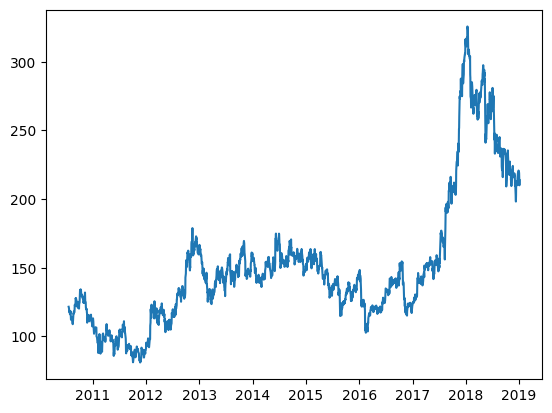

In [50]:
plt.plot(data["Close"], label = "Closing Price")

In [51]:
data["Open - Close"] = data["Open"] - data["Close"]
data["High - Low"] = data["High"] - data["Low"]
data = data.dropna()


Classification Problem: Buy(+1) or sell(-1) the stock

In [52]:
X = data[["Open - Close", "High - Low"]]
X.head()

,Open - Close,High - Low
Date,,
2010-07-21,0.55,1.95
2010-07-22,-0.60,1.75
2010-07-23,1.15,1.70
2010-07-26,2.50,3.90
2010-07-27,-1.05,7.50


Shift function shifts the column up or down

In [53]:
Y = np.where(data["Close"].shift(-1) > data["Close"], 1, -1)#if the next day's closing price is greater than today's closing price, then 1, else -1
Y

array([-1, -1, -1, ..., -1,  1, -1])

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 30)
#20 percent of the data is used for testing and 80 percent for training

In [55]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
#we want to find k which is a hyperparameter, so we use GridSearchCV to find the best k
params = {"n_neighbors": np.arange(1, 25)}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv = 5)



model.fit(X_train, Y_train)


accuracy_for_train = metrics.accuracy_score(Y_train, model.predict(X_train))
accuracy_for_test = metrics.accuracy_score(Y_test, model.predict(X_test))

print('Train Accuracy:', accuracy_for_train)   
print('Test Accuracy:', accuracy_for_test)


Train Accuracy: 0.5988095238095238
Test Accuracy: 0.5380952380952381


In [57]:
predictions = model.predict(X_test)
actual_and_predicted_data = pandas.DataFrame({"Actual": Y_test, "Predicted": predictions})
actual_and_predicted_data.head(10)


,Actual,Predicted
0,-1,-1
1,1,-1
2,1,1
3,-1,1
4,-1,-1
5,1,1
6,1,-1
7,1,1
8,1,-1
9,1,-1


In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

X_train_regression, X_test_regression, Y_train_regression, Y_test_regression = train_test_split(X, data["Close"], test_size = 0.2, random_state = 30)
params = {"n_neighbors": np.arange(1, 25)}
knn = neighbors.KNeighborsRegressor()
model_regression = GridSearchCV(knn, params, cv = 5)


model_regression.fit(X_train_regression, Y_train_regression)
predictions = model_regression.predict(X_test_regression)

print(predictions)

[126.60789474 117.78684211 128.73684211 122.32368421 121.56315789
 133.42105263 132.13157895 135.76842105 118.32631579 197.21315789
 132.77368421 144.80526316 131.53684211 207.97105263 189.06315789
 169.19473684 137.85789474 147.72894737 156.81842105 136.63947368
 130.4        128.47105263 141.02105263 135.84210526 237.51315789
 137.76578947 145.84736842 213.12631579 173.88157895 150.16842105
 138.62894737 131.89210526 127.64473684 136.72894737 135.83684211
 114.05526316 160.08421053 135.48157895 119.98421053 234.9
 122.95263158 138.54210526 117.81315789 142.64473684 141.26315789
 173.12105263 160.21315789 146.21842105 196.74473684 129.59210526
 160.01052632 137.89736842 186.33157895 144.77894737 155.95526316
 142.15       139.68684211 147.84736842 133.27631579 132.21842105
 177.23157895 114.58157895 183.86842105 133.24473684 209.68947368
 131.84473684 156.50263158 133.81842105 137.52105263 123.23421053
 130.28157895 115.62894737 186.60526316 139.7        145.7
 227.56578947 134.821052

In [61]:
rms = np.sqrt(metrics.mean_squared_error(Y_test_regression, predictions))
print(rms)

valids = pandas.DataFrame({"Actual": Y_test_regression, "Predicted": predictions})
valids.head(10)

38.95496407995754


,Actual,Predicted
Date,,
2014-11-11,158.25,126.607895
2015-02-26,152.55,117.786842
2011-05-30,86.85,128.736842
2016-07-14,132.60,122.323684
2010-11-03,124.55,121.563158
2015-03-16,154.75,133.421053
2015-06-19,133.75,132.131579
2012-04-16,118.50,135.768421
2016-10-18,151.90,118.326316
